##**Task 5 :- Prediction Using Decision Tree Algorithm**
###**Author :- Harsh Bhatia**

Task is to create the Decision Tree classifier for iris dataset and visualize it graphically.The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

link to the dataset:- https://bit.ly/3kXTdox

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
%matplotlib inline

# to avoid warnings during execution
from warnings import filterwarnings
filterwarnings('ignore') 

In [2]:
#importing iris dataset 
from google.colab import files
uploaded = files.upload()

#read data from link 
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

#displaying first 5 rows of the dataset
df.head()

Saving Iris.csv to Iris.csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##**Preliminary Analysis**

In [3]:
#displaying the number of rows and columns in the dataset
df.shape

(150, 6)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Observation:- We can see that the dataset has no null values

In [5]:
#to display the datatype of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

Observation :- We can see that in iris data set , there is data for 3 species with 50 entries for each

###**Preparing the data**
Dividing the data into inputs and output

In [7]:
X = df.iloc[:,1:5] #all features except id and species
Y=df['Species']

In [8]:
#splliting the data into training and testing data
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Training split=",X_train.shape)
print("Testing split=",X_test.shape)

Training split= (120, 4)
Testing split= (30, 4)


##**Preparing the decision tree model**
 
Decision Tree is a supervised learning method used in data mining for classification and prediction. 
 It  is a flowchart like tree structure, where: 
 * The uppermost decision node in a tree that relates to the best predictor called the root node.
 * each internal node denotes a test on an attribute, 
 * each branch represents an outcome of the test, 
 * each leaf node (terminal node) holds a class label. 

In [9]:
#defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='gini')
tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

##**Visualisation of the trained model**

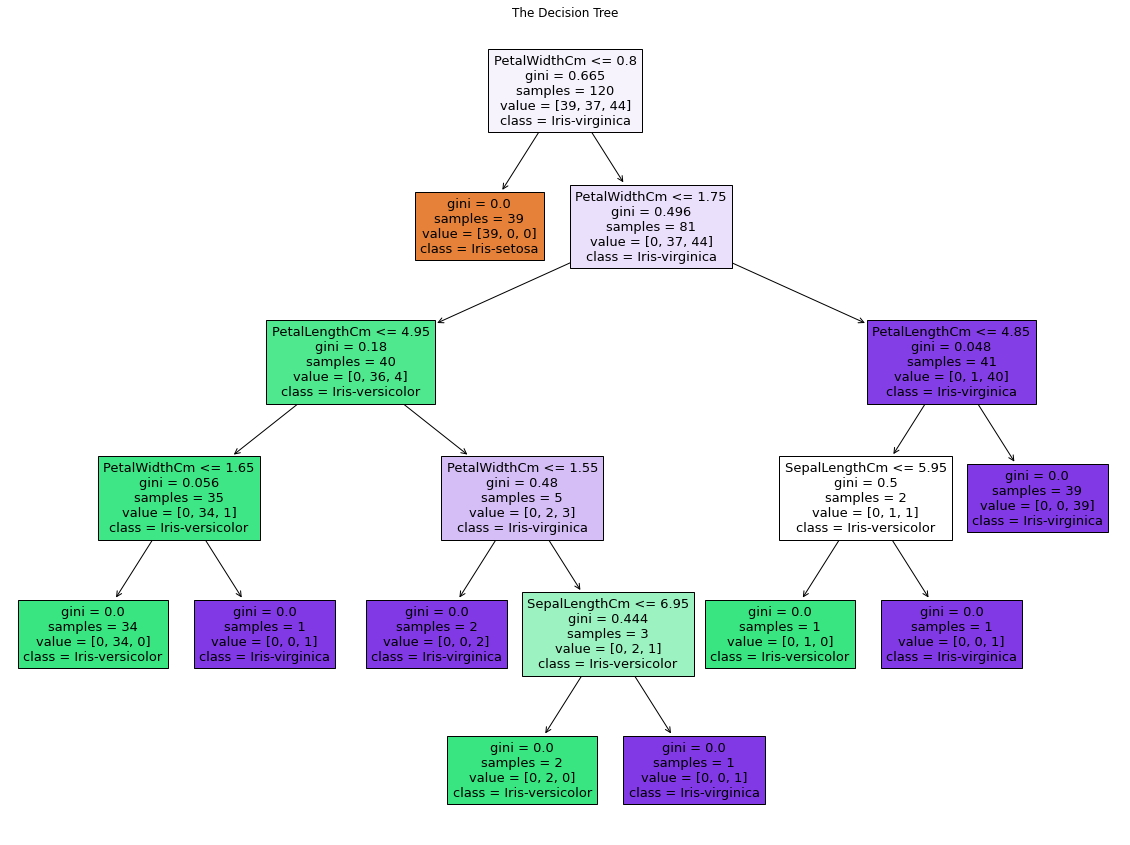

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(tree,feature_names=X.columns.values, filled=True, class_names=Y.unique())
plt.title("The Decision Tree")
plt.show()

In [10]:
#predicting the values for testing data
Y_pred=tree.predict(X_test)


In [11]:
#comparing the actual with the predicted value
compare= pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
compare

,Actual,Predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
100,Iris-virginica,Iris-virginica
40,Iris-setosa,Iris-setosa
86,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
71,Iris-versicolor,Iris-versicolor


In [12]:
test=pd.DataFrame(Y_test)
test['Species'].value_counts()

Iris-versicolor    13
Iris-setosa        11
Iris-virginica      6
Name: Species, dtype: int64

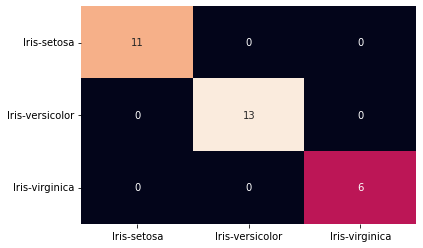

In [33]:
#In confusion matrix the rows represent actual class and columns represent predicted class 
import seaborn as sns
cm=sklearn.metrics.confusion_matrix(Y_test,Y_pred)
s=sns.heatmap(cm, annot=True,cbar=False)          
s.set_xticklabels(df['Species'].unique(), horizontalalignment='center')
s.set_yticklabels(df['Species'].unique(), rotation=0, verticalalignment='center')
plt.show()

Observation : We can see that all predictions of the species of the test data are correct

In [37]:
#Classification report displays the performance metrics
print("Classification report=\n",sklearn.metrics.classification_report(Y_test,Y_pred))

Classification report=
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [13]:
#checking the accuracy of the classifcation model
import sklearn.metrics
print("Accuracy=",sklearn.metrics.accuracy_score(Y_test,Y_pred))

Accuracy= 1.0


Observation: Accuracy is 100%